In [1]:
!python --version

Python 3.7.3


In [14]:
%matplotlib inline


In [15]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

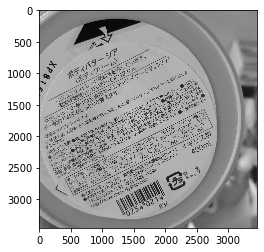

In [16]:
image = cv2.imread("04.jpg", 0)
image_out = cv2.imread("04.jpg")
plt.imshow(image, cmap='gray')

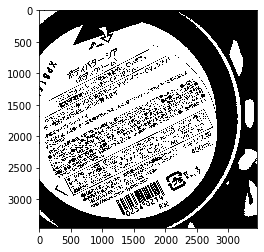

In [17]:
#thresholding
ret, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

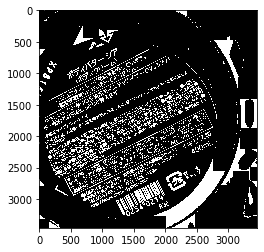

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,200))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(opening, cmap='gray')

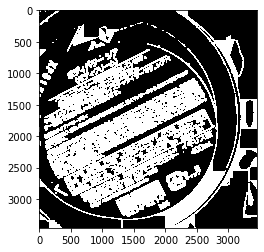

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [20]:
# find the contours in the thresholded image
(cnts, _) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# otherwise, sort the contours by area and compute the rotated
# bounding box of the largest contour
c = sorted(cnts, key = cv2.contourArea, reverse = True)[3]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

In [21]:
cv2.drawContours(image_out, [box], -1, (0, 255, 0), 3)

array([[[151, 156, 159],
        [150, 155, 158],
        [152, 157, 160],
        ...,
        [129, 135, 140],
        [129, 135, 140],
        [128, 134, 139]],

       [[150, 155, 158],
        [150, 155, 158],
        [151, 156, 159],
        ...,
        [130, 136, 141],
        [130, 136, 141],
        [129, 135, 140]],

       [[147, 152, 155],
        [147, 152, 155],
        [149, 154, 157],
        ...,
        [131, 137, 142],
        [132, 138, 143],
        [132, 138, 143]],

       ...,

       [[100, 116, 163],
        [ 99, 115, 162],
        [ 99, 115, 162],
        ...,
        [ 84,  95,  92],
        [ 84,  95,  92],
        [ 84,  95,  92]],

       [[101, 117, 164],
        [101, 117, 164],
        [101, 117, 164],
        ...,
        [ 83,  94,  91],
        [ 85,  96,  93],
        [ 83,  94,  91]],

       [[101, 117, 164],
        [101, 117, 164],
        [101, 117, 164],
        ...,
        [ 80,  91,  88],
        [ 84,  95,  92],
        [ 81,  92,  89]]

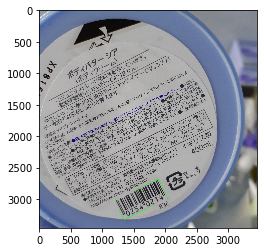

In [22]:
plt.imshow(image_out)


In [23]:
cv2.imwrite('out04.jpg', image_out)

True